In [12]:
import os 
DATAS = os.listdir('carla')[1:]
for data in DATAS:
    rgb_path = f'carla/{data}/{data}/CameraRGB/'
    seg_path = f'carla/{data}/{data}/CameraSeg/'
    rgbs = sorted(os.listdir(rgb_path))
    segs = sorted(os.listdir(seg_path))
    assert rgbs == segs
    for idx, (rgb, seg) in enumerate(zip(rgbs,segs)):
        old_rgb = os.path.join(rgb_path,rgb)
        new_rgb = os.path.join(rgb_path,str(idx)+'.png')
        
        old_seg = os.path.join(seg_path,seg)
        new_seg = os.path.join(seg_path,str(idx)+'.png')
        
        os.rename(old_rgb, new_rgb)
        os.rename(old_seg, new_seg)

In [33]:
def class2rg(out):
    classes = {
    0 : [0,0,0], # unlabeled
    1 : [70,70,70], # building
    2 : [190,153,153], # fence
    3 : [250,170,160], # other
    4 : [220,20,60], # pedestrian
    5 : [153,153,153], # pole
    6 : [157,234,50], # road line
    7 : [128,64,128], # road
    8 : [244,35,232], # sidewalk
    9 : [107,142,35], # vegetation
    10: [0,0,142], # car
    11: [102,102,156], # wall
    12: [220,220,0] # traffic sign
    }
    o = out
    seg = o.reshape(-1)
    mask = np.zeros((600*800,3))


    for idx, label in enumerate(seg):
        mask[idx] = classes[int(label)]

    return mask.reshape(600,800,3)

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
MAIN_PATH = 'carla/dataA/dataA/'

In [80]:
plt.figure(dpi=300)
plt.imshow((rgb+mask)/2)
plt.axis('off')
plt.imsave('test.png',(rgb+mask)/2)

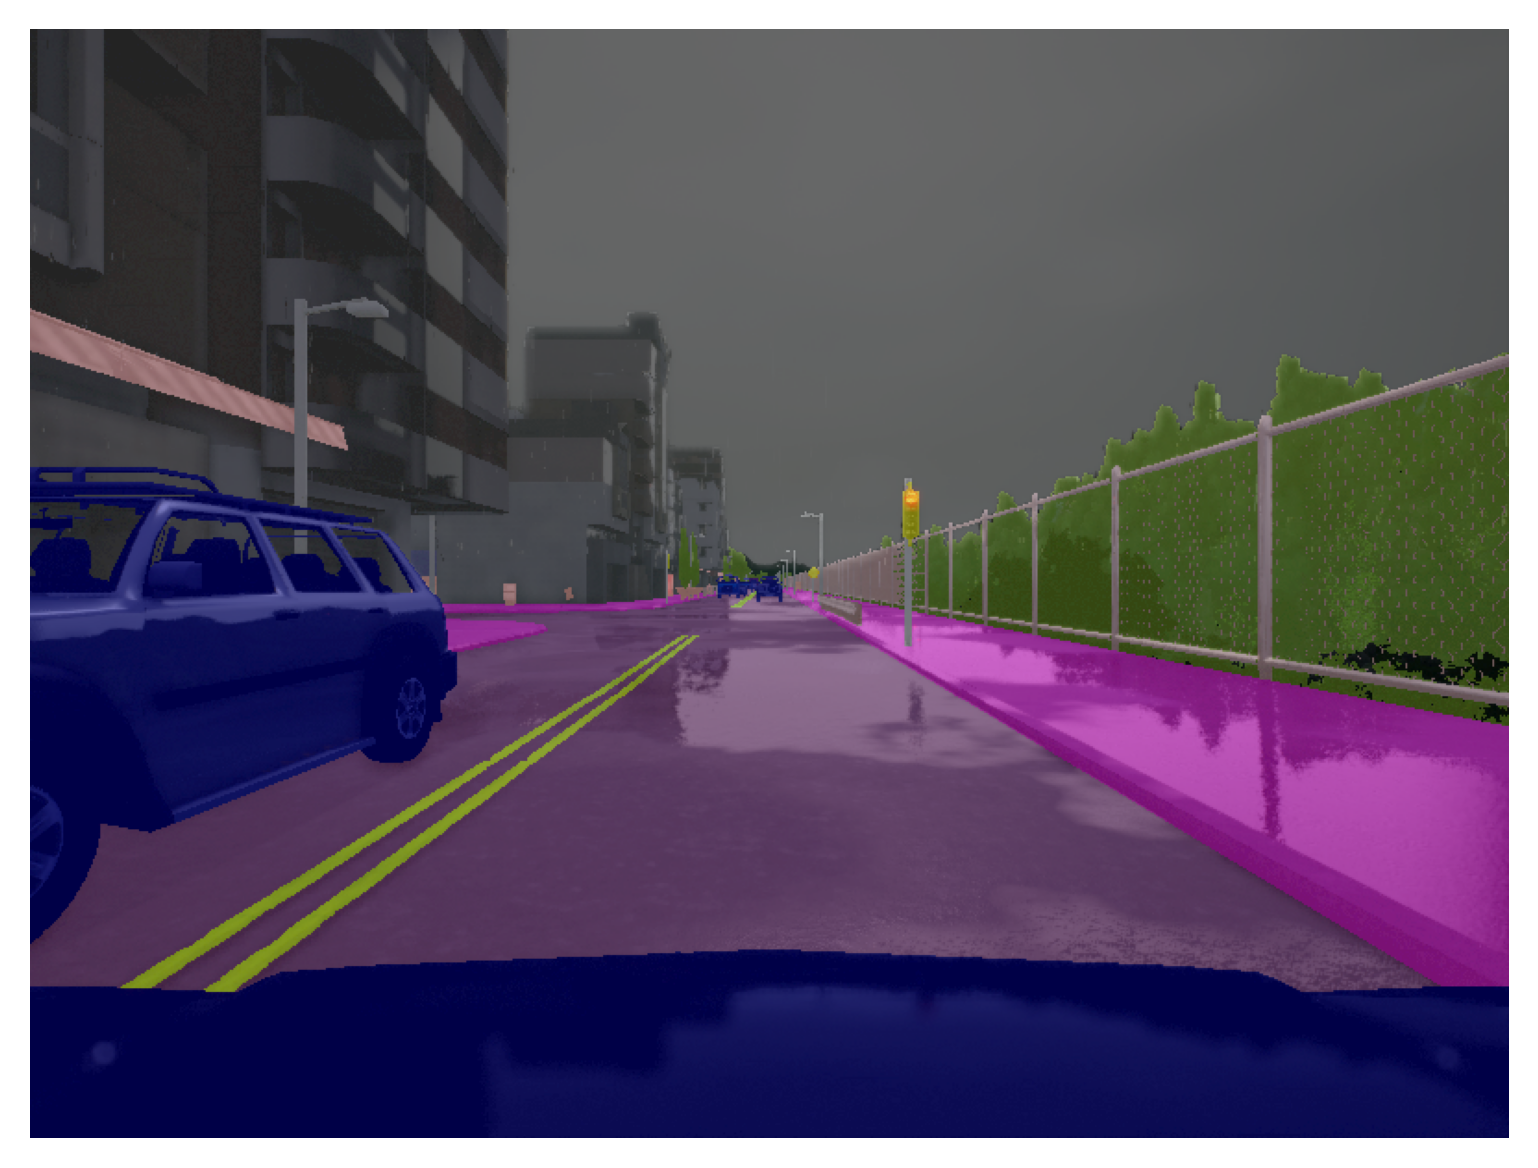

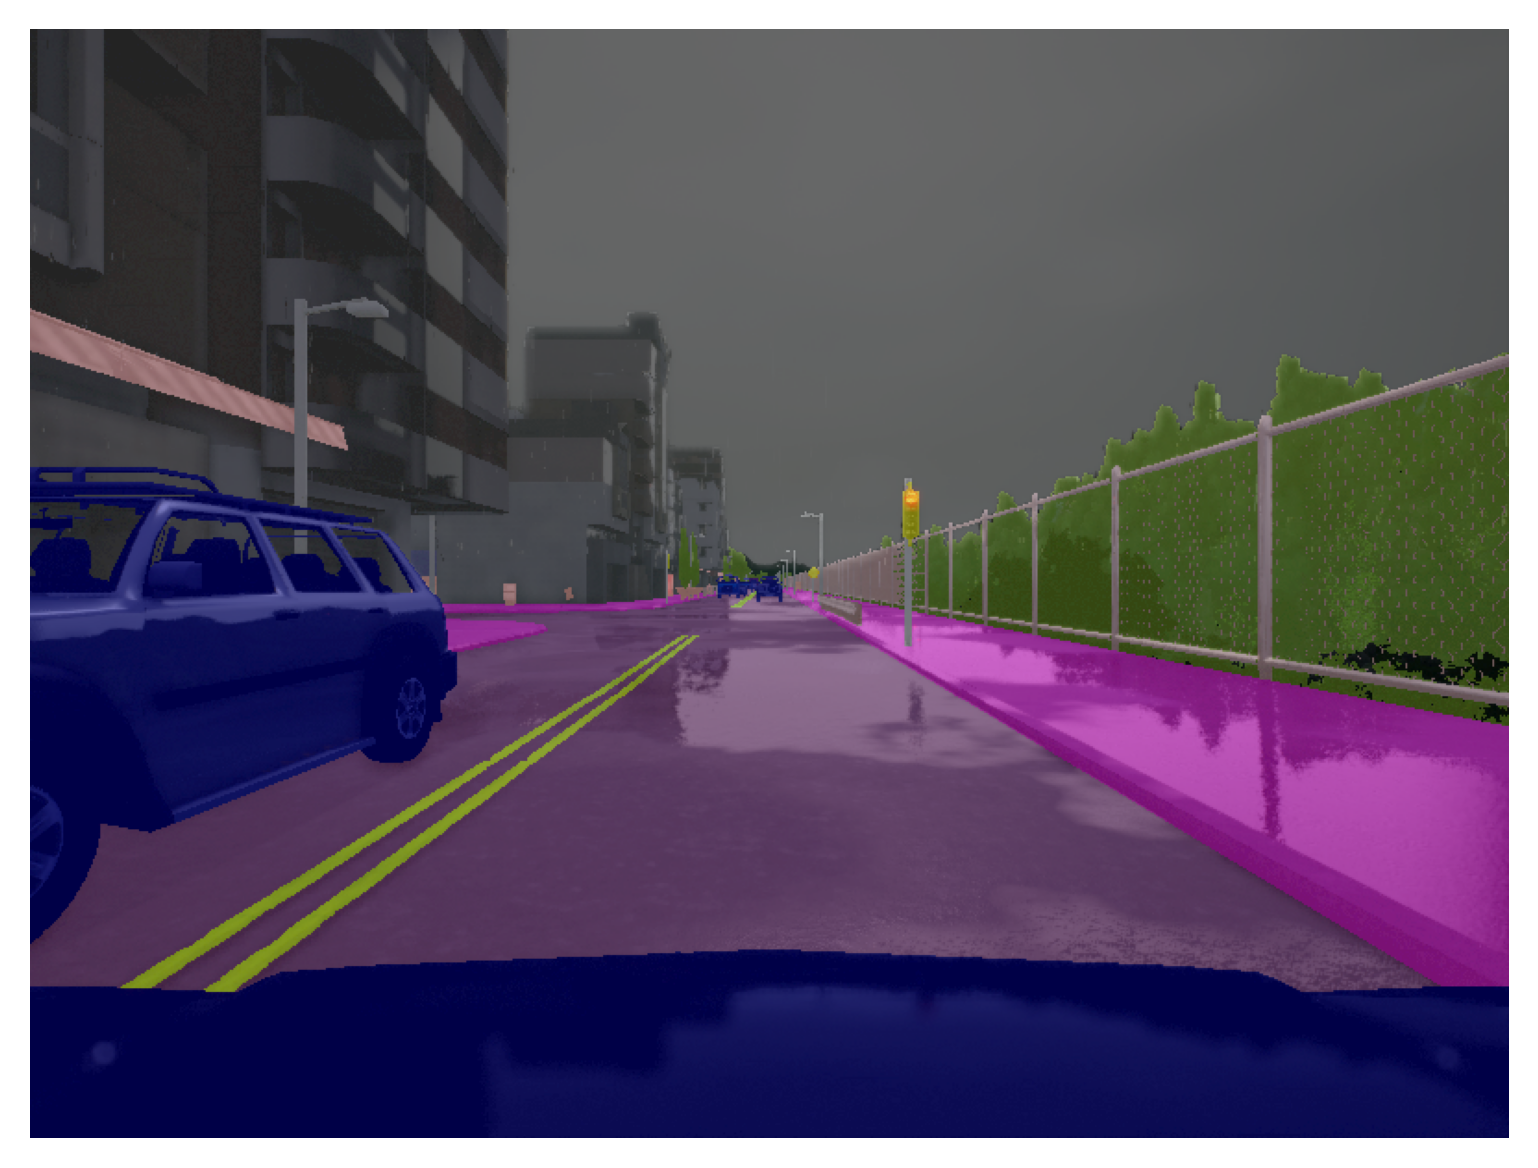

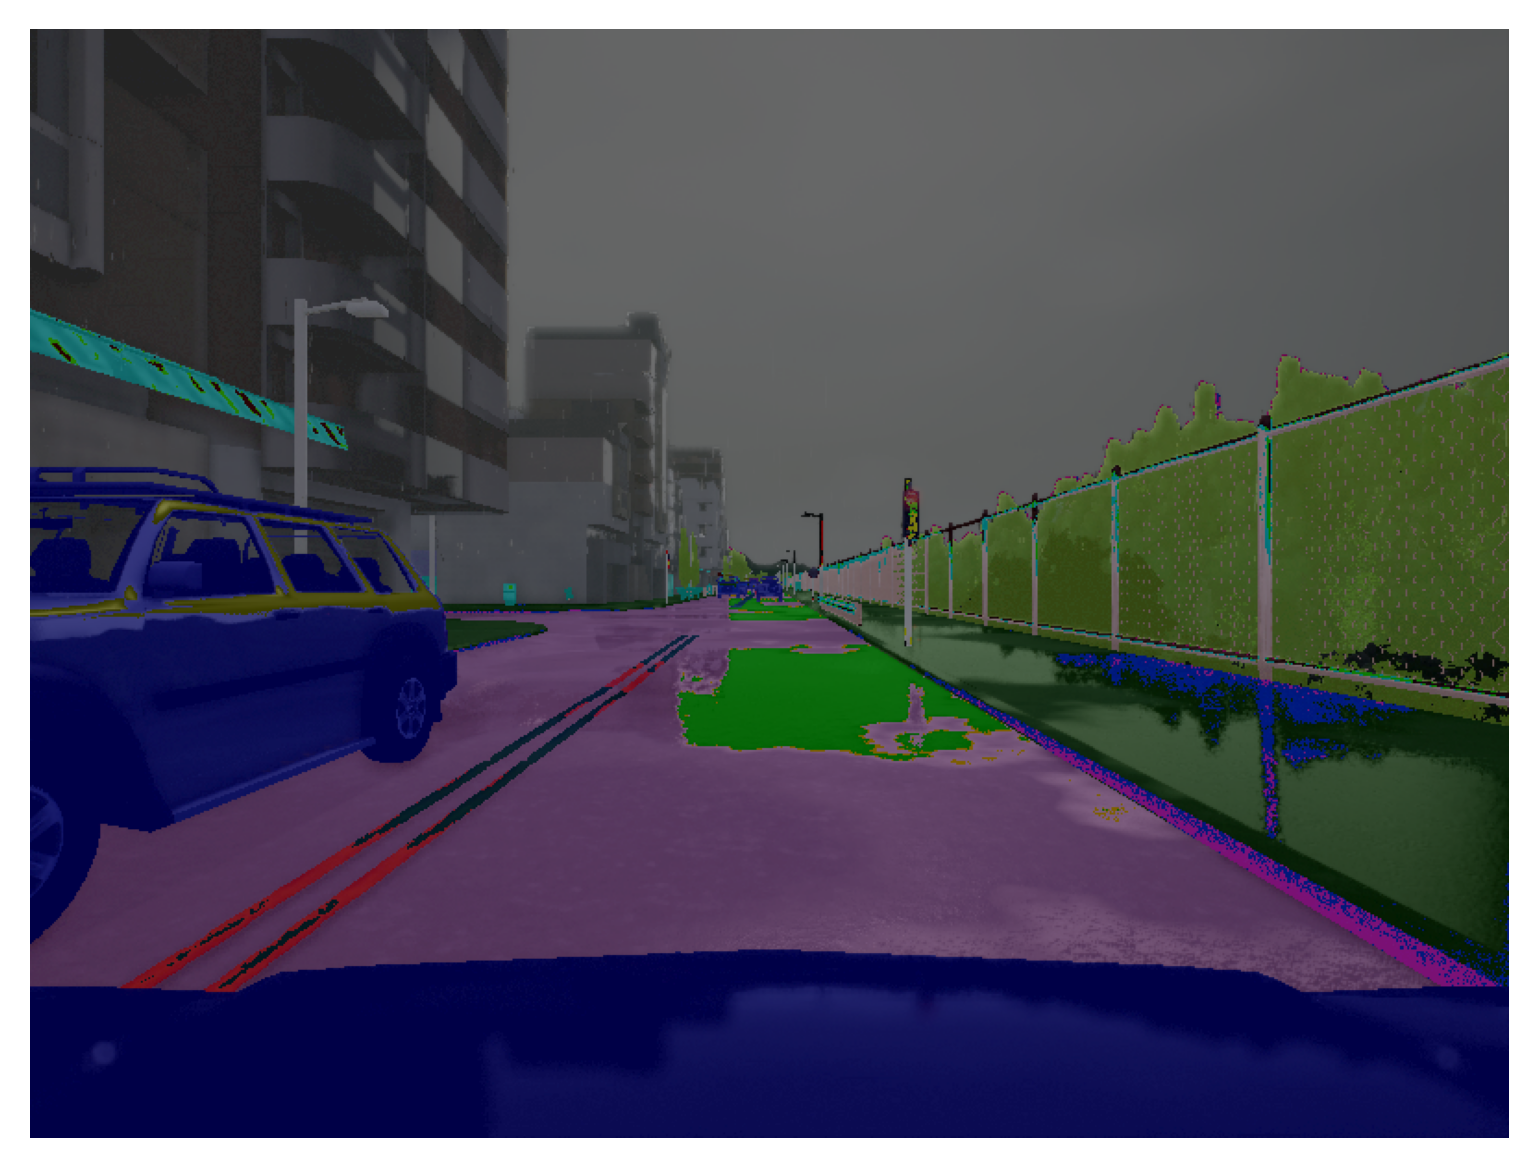

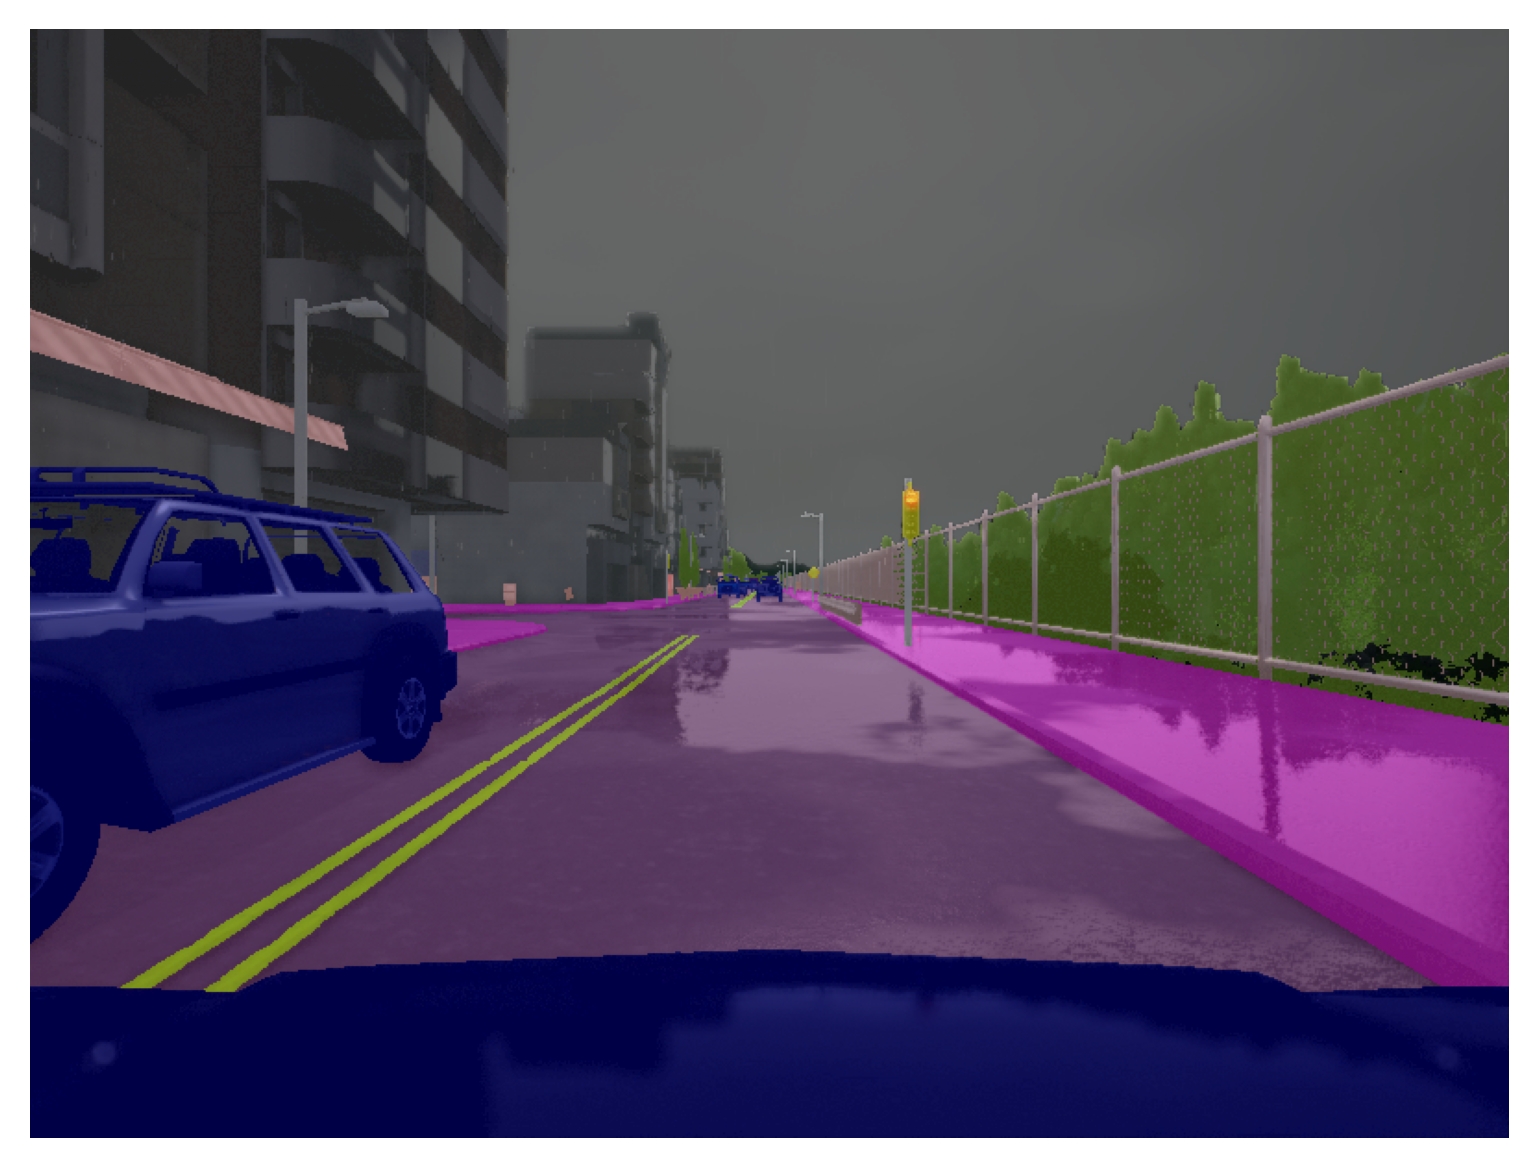

In [81]:
plt.show()

In [144]:
seg = plt.imread(MAIN_PATH + 'CameraSeg/620.png')[...,0]
rgb = plt.imread(MAIN_PATH + 'CameraRGB/620.png')
mask = class2rg(seg[...,0]*255) / 255
combined = (mask + rgb) / 2
image = Image.fromarray(np.uint8(combined*255)).convert('RGB')
new_image = image.resize((1600, 1200))
#new_image.show()

#new_image.save('test.png')

In [145]:
segs = seg
rgbs = rgb
for i in range(3):
    idx = np.random.randint(1,1000)
    seg = plt.imread(MAIN_PATH + f'CameraSeg/{idx}.png')[...,0]
    rgb = plt.imread(MAIN_PATH + f'CameraRGB/{idx}.png')
    segs = np.vstack((segs,seg))
    rgbs = np.vstack((rgbs,rgb))
    

In [146]:
plt.imsave('segs1.png',segs)
plt.imsave('rgbs1.png',rgbs)


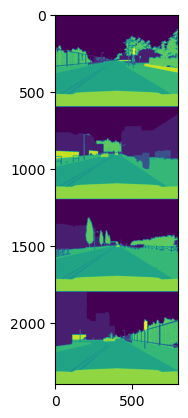